# Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import pyreadr

# Load data

In [2]:
community = pyreadr.read_r('inputs/LR_database.rda')

In [3]:
community = community["LR_database"]

In [4]:
community

,Pair.Name,Ligand,Ligand.Name,Receptor,Receptor.Name,complex_pair,partner_a,partner_b,source,target,...,consensus_stimulation,consensus_inhibition,sources,references,curation_effort,n_references,n_resources,annotation_strategy,db,True_LR
rownames,,,,,,,,,,,,,,,,,,,,,
1,A2M_LRP1,A2M,alpha-2-macroglobulin,LRP1,LDL receptor related protein 1,NaN,P01023,Q07954,P01023,Q07954,...,1.0,0.0,AlzPathway;Baccin2019;CellTalkDB;EMBRACE;Fanto...,AlzPathway:19026743;Baccin2019:10652313;Baccin...,11.0,4.0,11,LR,both,True
2,ACTR2_ADRB2,ACTR2,actin related protein 2,ADRB2,adrenoceptor beta 2,NaN,P61160,P07550,P61160,P07550,...,0.0,0.0,CellTalkDB;LRdb;Reactome_LRdb,CellTalkDB:32196115,1.0,1.0,2,LR,both,True
3,ACTR2_LDLR,ACTR2,actin related protein 2,LDLR,low density lipoprotein receptor,NaN,P61160,P01130,P61160,P01130,...,0.0,0.0,CellTalkDB;LRdb;Reactome_LRdb,CellTalkDB:32196115,1.0,1.0,2,LR,both,True
4,ACTR2_LRP2,ACTR2,actin related protein 2,LRP2,LDL receptor related protein 2,NaN,P61160,P98164,P61160,P98164,...,0.0,0.0,CellTalkDB;LRdb;Reactome_LRdb,CellTalkDB:32196115,1.0,1.0,2,LR,both,True
5,ADAM11_CCR4,ADAM11,ADAM metallopeptidase domain 11,CCR4,C-C motif chemokine receptor 4,NaN,O75078,P51679,O75078,P51679,...,1.0,0.0,Kirouac2010,NaN,0.0,0.0,1,LR,LR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29481,LAMB1_CD151,LAMB1,laminin subunit beta 1,CD151,CD151 molecule (Raph blood group),NaN,P07942,P48509,P07942,P48509,...,1.0,0.0,HPMR;Wang,HPMR:10842354;HPMR:15677332,2.0,2.0,2,curated,curated,False
29491,MAML2_NOTCH1,MAML2,mastermind like transcriptional coactivator 2,NOTCH1,notch receptor 1,NaN,Q8IZL2,P46531,Q8IZL2,P46531,...,1.0,0.0,HPRD;NetPath;SignaLink3;Wang,HPRD:12370315;NetPath:12370315;SignaLink3:1237...,4.0,2.0,4,curated,curated,False
29501,MAML2_NOTCH2,MAML2,mastermind like transcriptional coactivator 2,NOTCH2,notch receptor 2,NaN,Q8IZL2,Q04721,Q8IZL2,Q04721,...,1.0,0.0,HPRD;NetPath;SignaLink3;Wang,HPRD:12370315;NetPath:12370315;SignaLink3:1237...,4.0,2.0,4,curated,curated,False


**Note on CellPhoneDB:**

CellPhoneDB uses an SQL database, which is provided as a .db file containing 6 tables. To work with these tables, we extract their data as CSV files, as explained in detail in the notebook RestructureCPDB/BreakdownCPDB.ipynb.

One feature of CPDB is that it doesn't have directionality. To make the data easier to work with, we put the ligands of each pair in one column and the receptors in another column. However, if the pair consists of adhesion molecules that bind to each other, the order doesn't matter.

Another challenge we faced is that CPDB contains complex molecules, which are not present in the databases used by `community` and `NicheNet`. To address this, we break down each complex into its individual components and create pairwise links between them. For example, if we have a complex called R1_R2 (consisting of two receptors) that is paired with ligand L1, we break down this pair into L1_R1 and L1_R2.


In their default DB, a complex molecule is given an ID that is greater than 1282

In [5]:
cpdb = pd.read_csv ('inputs/cpdb_original.csv', index_col=None)

In [6]:
nnet_lr = pd.read_csv ('inputs/nichenetr_lr.csv', index_col=None)

In [7]:
#create pairs in nnet
nnet_lr["pairs"]=nnet_lr["from"] + "_" + nnet_lr["to"]

# Ligand-receptor pairs

## Compare original databases

In [8]:
#get unique list of pairs in Commpackage
community_pairs = set(community['Pair.Name'])

In [9]:
#get unique list of pairs in cpdb

cpdb_pairs = set(cpdb['pairs'])

In [10]:
#get unique list of pairs in nnet

nnet_pairs = set(nnet_lr['pairs'])

**Curated + predicted**

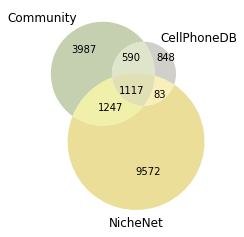

In [104]:
#plot pairs of 3 DBs in one

venn3([community_pairs,cpdb_pairs, nnet_pairs], ("Community",'CellPhoneDB', 'NicheNet'), ('#6e8b3d', '#8b8878', '#cdad00'))
plt.savefig('ComparisonFigures/pairs_curated_predicted.pdf')

In [107]:
1117+590+848+83

2638

In [108]:
len(cpdb_pairs)

2638

In [12]:
pairs_list = set(list(community_pairs)+list(cpdb_pairs)+list(nnet_pairs))

In [13]:
to_export = {
    'ID': list(pairs_list),
    'community': [True if pair in community_pairs else False for pair in pairs_list],
    'CPDB': [True if pair in cpdb_pairs else False for pair in pairs_list],
    'NicheNet': [True if pair in nnet_pairs else False for pair in pairs_list]
}

In [14]:
to_export = pd.DataFrame(to_export)

In [15]:
to_export.to_csv("output_csv/pairs_curated_predicted.csv")

In [16]:
notin_community=to_export[to_export["community"]==False]

In [17]:
notin=list()
count=0
for x in notin_community["ID"]:
    rev=x.split('_')
    rev=rev[1]+"_"+rev[0]
    if rev not in community_pairs:
        notin.append(x)
    else:
        count += 1

We are checking if any pairs that are not in the community exist in reverse order in other databases. We have found that 289 pairs appear in other databases in reverse order.

In addition, we are investigating each database separately to determine why the pairs are not in our database. Specifically, we are currently examining CPDB to identify any reasons why certain pairs are missing.

The `pid1` and `pid2` columns in CPDB dataset indicate the original pairID from CPDB. Although CPDB assigns pairIDs starting from 1, complex molecules are assigned IDs greater than or equal to 1282. We have observed that the pairs that are not present in our community database are actually part of complex molecules in CPDB.

In [18]:
not_community_yes_cpdb=notin_community[notin_community["ID"].isin(notin) & notin_community["CPDB"] == True]

In [19]:
#retrieve the table from the original df, so we can check where these pairs are originating from
x=cpdb[cpdb["pairs"].isin(not_community_yes_cpdb["ID"])]

In [20]:
len((x['pid1'] > 1280 )| (x['pid2'] > 1280))

680

**Note:** We can do a deeper investigation for NN pairs

**Curated only**

In [21]:
#nnet predicted 10.629 pairs, lets see how does the comparison look without the predicted pairs
nnet_nopridcition=nnet_lr[~nnet_lr["database"].str.contains("ppi_")]
nopredict_pairs=set(nnet_nopridcition["pairs"])

In [22]:
#get curated pairs from community
community_curated = community[community["db"].isin(["both","curated"])]
community_curated = set(community_curated["Pair.Name"])

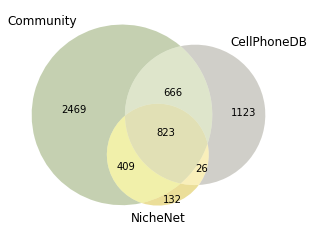

In [109]:
#plot pairs of 3 DBs in one, but in this one we do not include the predicted pairs for NicheNet
venn3([community_curated,cpdb_pairs, nopredict_pairs], ("Community",'CellPhoneDB', 'NicheNet'), ('#6e8b3d', '#8b8878', '#cdad00'))
plt.savefig('ComparisonFigures/pairs_curated.pdf')

In [ ]:
409+823+132+26

In [ ]:
len(nnet_nopridcition)

In [24]:
pairs_list = set(list(community_curated)+list(cpdb_pairs)+list(nopredict_pairs))

to_export = {
    'ID': list(pairs_list),
    'community': [True if pair in community_pairs else False for pair in pairs_list],
    'CPDB': [True if pair in cpdb_pairs else False for pair in pairs_list],
    'NicheNet': [True if pair in nnet_pairs else False for pair in pairs_list]
}

to_export = pd.DataFrame(to_export)
to_export.to_csv("output_csv/pairs_curated.csv")

# Ligand and receptor gene space

In [25]:
community_gene_space = set([substring for value in list(community_pairs) for substring in value.split('_')])

In [26]:
cpdb_gene_space = set([substring for value in list(cpdb_pairs) for substring in value.split('_')])

In [27]:
nnet_gene_space = set([substring for value in list(nnet_pairs) for substring in value.split('_')])

In [28]:
nnet_nopredict_gene_space = set([substring for value in list(nopredict_pairs) for substring in value.split('_')])

In [29]:
community_curated_gene_space = set([substring for value in list(community_curated) for substring in value.split('_')])

**Curated + predicted**

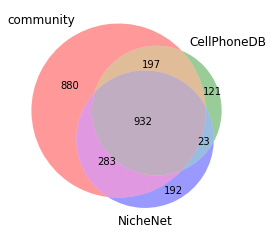

In [99]:
#plot gene space of 3 DBs in one

venn3([community_gene_space,cpdb_gene_space, nnet_gene_space], ("community",'CellPhoneDB', 'NicheNet'))
plt.savefig('ComparisonFigures/genes_curated_predicted.pdf')

In [31]:
gene_list = set(list(community_gene_space)+list(cpdb_gene_space)+list(nnet_gene_space))

to_export = {
    'ID': list(gene_list),
    'community': [True if gene in community_gene_space else False for gene in gene_list],
    'CPDB': [True if gene in cpdb_gene_space else False for gene in gene_list],
    'NicheNet': [True if gene in nnet_gene_space else False for gene in gene_list]
}

to_export = pd.DataFrame(to_export)
to_export.to_csv("output_csv/genes_curated_predicted.csv")

We are investigating why some genes are not included in our database. As previously mentioned, CPDB assigns `pid` values greater than 1282 if the protein is part of a complex. We have discovered that the genes that are not present in our database are once again coming from these complex molecules.

In [62]:
len(nnet_gene_space)

1430

In [59]:
880+283+932+197

2292

In [32]:
notin_community=to_export[to_export["community"]==False]

In [33]:
cpdb[cpdb["ligand"].isin(notin_community["ID"])]

,L,R,ligand,receptor,l_adhesion_mol,r_adhesion_mol,pid1,pid2,pairs
0,901,917,PTGR1,LTB4R,0,0,1282.0,917.0,PTGR1_LTB4R
1,315,917,LTA4H,LTB4R,0,0,1430.0,917.0,LTA4H_LTB4R
2,901,1189,PTGR1,LTB4R2,0,0,1282.0,1189.0,PTGR1_LTB4R2
3,315,1189,LTA4H,LTB4R2,0,0,1430.0,1189.0,LTA4H_LTB4R2
4,315,864,LTA4H,GPR17,0,0,1430.0,864.0,LTA4H_GPR17
...,...,...,...,...,...,...,...,...,...
2629,544,698,RXRB,ALDH1A3,1,0,1513.0,1481.0,RXRB_ALDH1A3
2630,698,372,ALDH1A3,RARG,1,0,1513.0,1482.0,ALDH1A3_RARG
2631,372,698,RARG,ALDH1A3,1,0,1513.0,1482.0,RARG_ALDH1A3
2632,698,708,ALDH1A3,RXRG,1,0,1513.0,1483.0,ALDH1A3_RXRG


Upon investigating why some genes are included in NicheNet but not in our database, we discovered that most of them were added based on predictions, mainly through Gene Ontology (GO). Additionally, we found that there are a few genes in NicheNet that originate from the Ramilowski dataset, but genesymbols are listed under alternative names according to genecards and uniprot. For instance, CTGF's approved gene symbol is CCN2, CYR61 is included as CCN1, and DEFB4A is included as DEFB4B.

In [34]:
nnet_lr[nnet_lr["from"].isin(notin_community["ID"])]["database"].value_counts()

database
ppi_prediction_go     180
ppi_prediction         26
ramilowski             14
kegg                    6
guide2pharmacology      4
Name: count, dtype: int64

In [35]:
x=nnet_lr[nnet_lr["from"].isin(notin_community["ID"])]

In [36]:
x[x["database"]=="ramilowski"]

,Unnamed: 0,from,to,source,database,pairs
1109,1110,CTGF,ITGAM,ramilowski_known,ramilowski,CTGF_ITGAM
1110,1111,CTGF,ITGB2,ramilowski_known,ramilowski,CTGF_ITGB2
1111,1112,CTGF,LRP6,ramilowski_known,ramilowski,CTGF_LRP6
1136,1137,CYR61,ITGA5,ramilowski_known,ramilowski,CYR61_ITGA5
1137,1138,CYR61,ITGAM,ramilowski_known,ramilowski,CYR61_ITGAM
1138,1139,CYR61,ITGB2,ramilowski_known,ramilowski,CYR61_ITGB2
1139,1140,CYR61,ITGB3,ramilowski_known,ramilowski,CYR61_ITGB3
1140,1141,DEFB4A,CCR6,ramilowski_known,ramilowski,DEFB4A_CCR6
1429,1430,IFNA13,IFNAR1,ramilowski_known,ramilowski,IFNA13_IFNAR1
1430,1431,IFNA13,IFNAR2,ramilowski_known,ramilowski,IFNA13_IFNAR2


**Curated only**

In [ ]:
palette = {'NicheNet': '#cdad00', 'community': '#6e8b3d', 'CellPhoneDB': '#8b8878'}

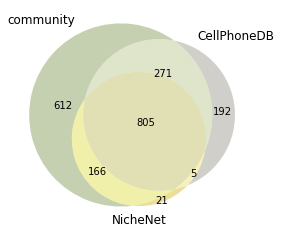

In [97]:
#plot gene space of 3 DBs in one

venn3([community_curated_gene_space,cpdb_gene_space, nnet_nopredict_gene_space], ("community",'CellPhoneDB', 'NicheNet'), ('#6e8b3d', '#8b8878', '#cdad00'))
# venn3_circles(subsets = [community_curated_gene_space,cpdb_gene_space, nnet_nopredict_gene_space], linestyle='dashed', linewidth=1, color="grey")
plt.savefig('ComparisonFigures/genes_curated.pdf')

In [67]:
gene_list = set(list(community_curated_gene_space)+list(cpdb_gene_space)+list(nnet_nopredict_gene_space))

to_export = {
    'ID': list(gene_list),
    'community': [True if gene in community_curated_gene_space else False for gene in gene_list],
    'CPDB': [True if gene in cpdb_gene_space else False for gene in gene_list],
    'NicheNet': [True if gene in nnet_nopredict_gene_space else False for gene in gene_list]
}

to_export = pd.DataFrame(to_export)
to_export.to_csv("output_csv/genes_curated.csv")

In [57]:
len(nnet_nopredict_gene_space)

997